
# **3.1 Tiền xử lý**




In [1]:
import pandas as pd 
df=pd.read_csv("/content/HistoricalVN30Data.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.set_index('Date')
df.head()

,Unnamed: 0,Change %,Close,Volume,Open,High,Low
Date,,,,,,,
2022-06-16,0,2.18%,"1,280.37","163,220,600","1,267.10","1,290.21","1,264.07"
2022-06-15,1,-0.64%,"1,253.09","167,431,200","1,263.63","1,268.33","1,231.12"
2022-06-14,2,0.02%,"1,261.16","145,640,500","1,247.39","1,271.28","1,245.26"
2022-06-13,3,-4.89%,"1,260.85","199,019,600","1,295.26","1,300.45","1,260.85"
2022-06-10,4,-1.28%,"1,325.69","136,585,200","1,332.93","1,344.85","1,325.69"


In [2]:
len(df)
#Delete Unamed: 0
df = df.drop("Unnamed: 0", axis=1)
#Reverse df
df=df[::-1]
df

,Change %,Close,Volume,Open,High,Low
Date,,,,,,
2012-10-31,-0.10%,458.56,"44,087,602",458.41,460.57,456.38
2012-11-01,-0.10%,458.06,"33,147,894",458.30,460.76,458.06
2012-11-02,-3.50%,441.90,"23,995,640",452.83,452.83,441.42
2012-11-05,1%,446.51,"12,484,210",437.29,446.51,437.16
2012-11-06,0%,446.63,"33,152,701",446.05,449.31,443.86
...,...,...,...,...,...,...
2022-06-10,-1.28%,"1,325.69","136,585,200","1,332.93","1,344.85","1,325.69"
2022-06-13,-4.89%,"1,260.85","199,019,600","1,295.26","1,300.45","1,260.85"
2022-06-14,0.02%,"1,261.16","145,640,500","1,247.39","1,271.28","1,245.26"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2400 entries, 2012-10-31 to 2022-06-16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Change %  2400 non-null   object
 1   Close     2400 non-null   object
 2   Volume    2400 non-null   object
 3   Open      2400 non-null   object
 4   High      2400 non-null   object
 5   Low       2400 non-null   object
dtypes: object(6)
memory usage: 131.2+ KB


In [4]:
df["Close"]=df["Close"].str.replace(',','')
df["Volume"]=df["Volume"].str.replace(',','')
df["Open"]=df["Open"].str.replace(',','')
df["High"]=df["High"].str.replace(',','')
df["Low"]=df["Low"].str.replace(',','')
df['Change %']=df['Change %'].str.replace('%','')
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2400 entries, 2012-10-31 to 2022-06-16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Change %  2400 non-null   float64
 1   Close     2400 non-null   float64
 2   Volume    2400 non-null   int64  
 3   Open      2400 non-null   float64
 4   High      2400 non-null   float64
 5   Low       2400 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 131.2 KB


In [5]:
df

,Change %,Close,Volume,Open,High,Low
Date,,,,,,
2012-10-31,-0.10,458.56,44087602,458.41,460.57,456.38
2012-11-01,-0.10,458.06,33147894,458.30,460.76,458.06
2012-11-02,-3.50,441.90,23995640,452.83,452.83,441.42
2012-11-05,1.00,446.51,12484210,437.29,446.51,437.16
2012-11-06,0.00,446.63,33152701,446.05,449.31,443.86
...,...,...,...,...,...,...
2022-06-10,-1.28,1325.69,136585200,1332.93,1344.85,1325.69
2022-06-13,-4.89,1260.85,199019600,1295.26,1300.45,1260.85
2022-06-14,0.02,1261.16,145640500,1247.39,1271.28,1245.26


**3.3 Trực quan hóa và khám phá dữ liệu sau tiền xử lý**

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [7]:
#Candlestick Chart with Volume Bars
figure=make_subplots(specs=[[{"secondary_y":True}]])

figure.add_trace(go.Candlestick(
    x=df.index,
    low=df["Low"],
    high=df["High"],
    close=df["Close"],
    open=df["Open"]),
    secondary_y=True)
figure.add_trace(go.Bar(x=df.index,y=df["Volume"]),secondary_y=False)
figure.update_layout(
    title="VN30",
    yaxis_title="VN30 Volume/Price",
    xaxis_title="Date"

)

Text(0.5, 1.0, 'Biểu đồ thể hiện sự biến động (%) của VN30 theo ngày')

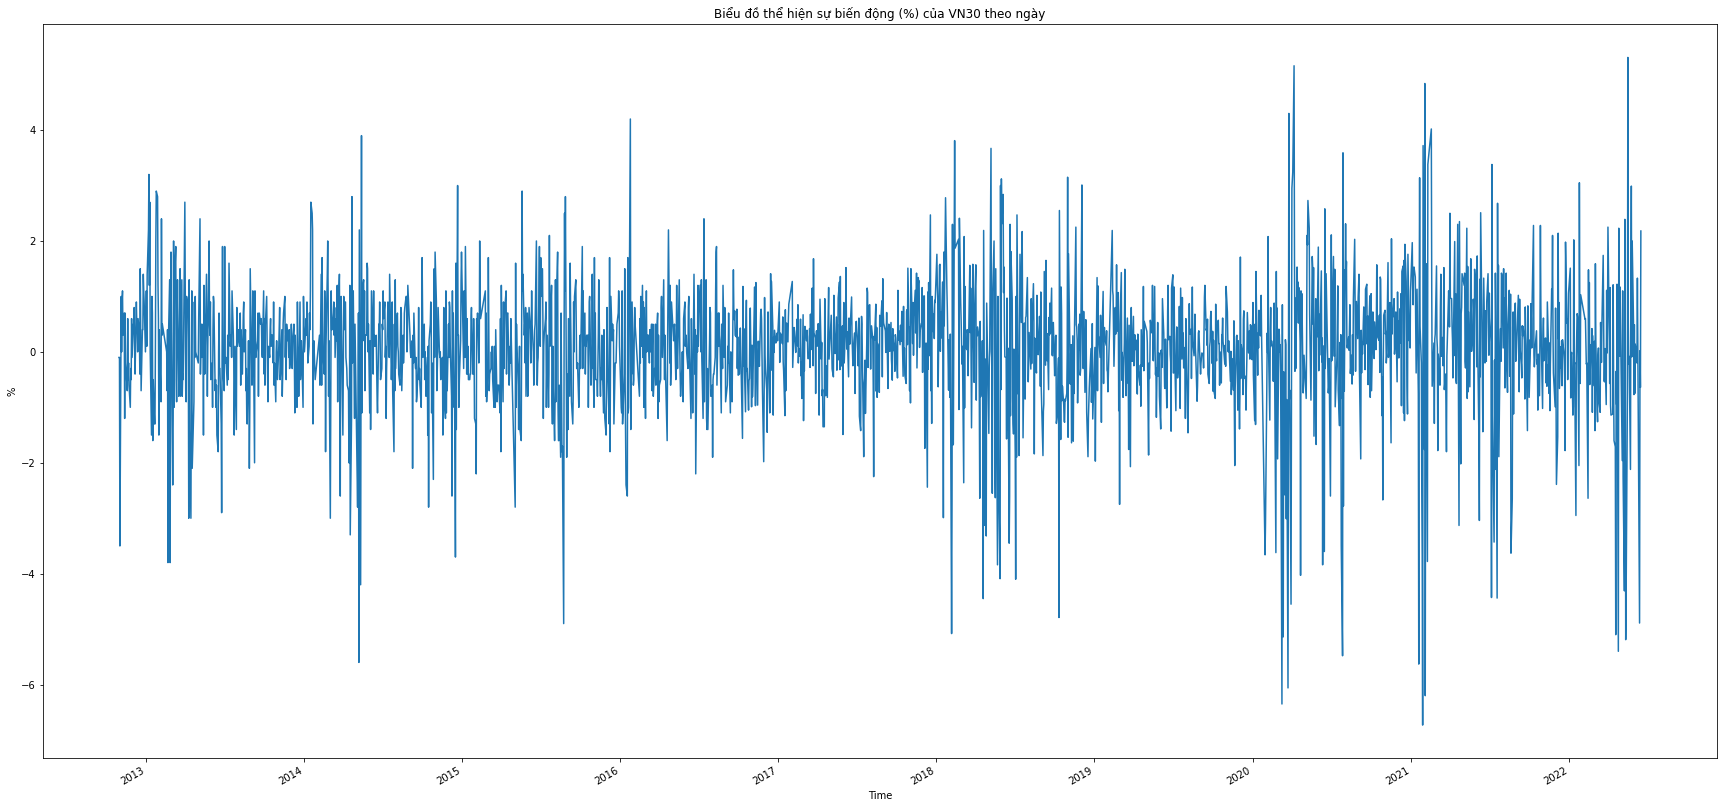

In [8]:
df["Change %"].plot(figsize=(30,15))
plt.ylabel("%")
plt.xlabel("Time")
plt.title("Biểu đồ thể hiện sự biến động (%) của VN30 theo ngày")
#Nhận xét: Nhìn chung thì những năm gần đây VN30 biến động tăng giảm mạnh hơn so với những năm 2012-2013

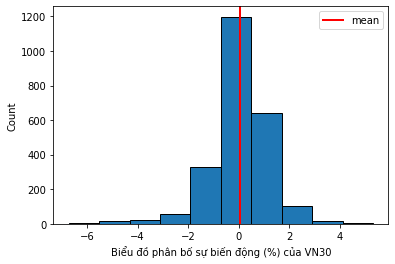

In [9]:
import numpy as np
mean_change=np.mean(df["Change %"])
plt.hist(df["Change %"],  edgecolor='black')
plt.xlabel("Biểu đồ phân bố sự biến động (%) của VN30")
plt.ylabel("Count")
plt.axvline(mean_change, color='r', linestyle='solid', linewidth=2, label="mean")
plt.legend()
plt.show()

# **3.2. Lựa chọn đặc trưng và giảm chiều**

In [10]:
VN30_price=pd.DataFrame(df["Close"])


In [11]:
VN30_price.head()

,Close
Date,
2012-10-31,458.56
2012-11-01,458.06
2012-11-02,441.90
2012-11-05,446.51
2012-11-06,446.63


Text(0.5, 1.0, 'Price of VN30 from 31 Oct 2012 to 16 Jun 2022')

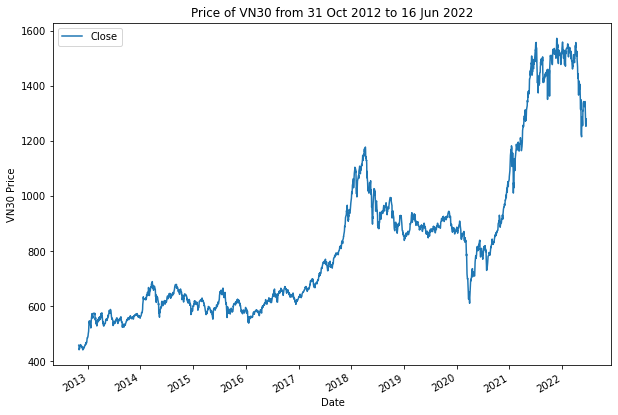

In [12]:
import matplotlib.pyplot as plt
VN30_price.plot(figsize=(10,7))
plt.ylabel("VN30 Price")
plt.title("Price of VN30 from 31 Oct 2012 to 16 Jun 2022")

# **3.4 Chia dữ liệu và biến đổi dữ liệu**


**3.4.1 Chia dữ liệu**

In [13]:
#VN30 date array
timesteps=VN30_price.index.to_numpy()
prices=VN30_price["Close"].to_numpy()
from sklearn.model_selection import train_test_split 
#Train 80%, Test 20%
X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    shuffle=False,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1920,), (480,), (1920,), (480,))

In [14]:
#Create a function to plot time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("VN30 Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

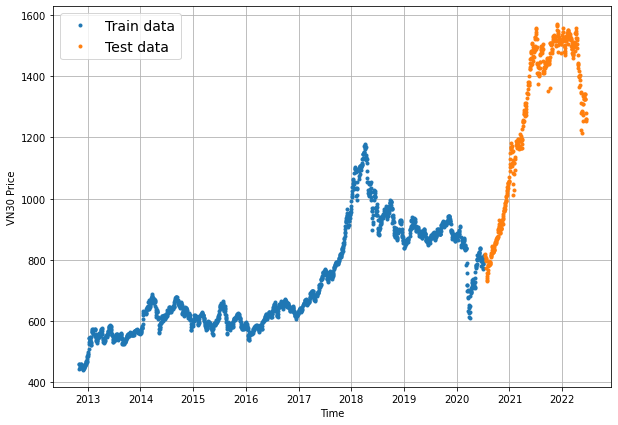

In [15]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

**3.4.2 Biến đổi dữ liệu**

Sử dụng Windowing dataset để đưa time series về học có giám sát tức có features, labels

**Horizon** = Số timesteps được dự đoán 

**Window** = Số timesteps dữ liệu quá khứ để dự đoán Horizon

Muốn dự đoán Chỉ số VN30 ngày mai ( 1 ngày trong tương lai) thì sử dụng Chỉ số VN30 của 10 ngày phía trước. Horizon=1 và Window=10
Ví dụ: Window dữ liệu 10 ngày

```
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] -> [10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] -> [11]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11] -> [12]
```


In [16]:
HORIZON=1 #predict 1 step at a time
WINDOW_SIZE=10 # Use 10 values to predict the horizon

In [17]:
def make_windows(x,window_size=10,horizon=1):
  import numpy as np
  windows=[]
  labels=[]
  #10 timesteps and 1 output
  for i in range(window_size, len(x)):
    windows.append(x[i-window_size:i, 0]) 
    labels.append(x[i, 0])
  windows, labels = np.array(windows), np.array(labels)
  #Turns a 1D array into a 2D array of sequential windows of window_size.
  windows = np.reshape(windows, (windows.shape[0], windows.shape[1]))
  return windows, labels

In [18]:
prices=VN30_price.iloc[:,0:1].values

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
print(full_windows.shape)
print(full_labels.shape)

(2390, 10)
(2390,)


In [19]:
# Show the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [458.56 458.06 441.9  446.51 446.63 450.83 455.78 457.23 460.56 455.08] -> Label: 458.21
Window: [458.06 441.9  446.51 446.63 450.83 455.78 457.23 460.56 455.08 458.21] -> Label: 457.08
Window: [441.9  446.51 446.63 450.83 455.78 457.23 460.56 455.08 458.21 457.08] -> Label: 455.67


In [20]:
feature_train,feature_test,label_train,label_test=train_test_split(full_windows,full_labels,test_size=0.2, random_state=42,shuffle=False)
len(feature_train), len(feature_test), len(label_train), len(label_test)

(1912, 478, 1912, 478)

# 4.1 Model 1: Navie Forecast (baseline)

Một trong những mô hình cơ bản trong dự đoán time series, là naive model, không yêu cầu quá trình huấn luyện
Công thức: 
$$\hat{y}_{t} = y_{t-1}$$ 


> Giá trị dự đoán tại timestep `t` (y-hat) bằng giá trị tại timestep `t-1` (timestep phía trước đó).
Tuy đơn giản nhưng Naive Model có độ chính xác cao trong các Open System ( Như stock market hay crypto market)

In [21]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([819.83, 814.16, 803.36, 804.7 , 797.85, 800.29, 772.29, 729.93,
        756.17, 735.16]),
 array([1325.49, 1327.4 , 1327.04, 1324.37, 1342.03, 1342.92, 1325.69,
        1260.85, 1261.16, 1253.09]))

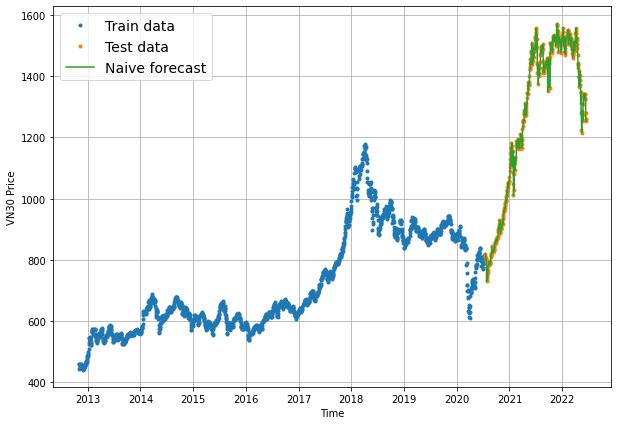

In [22]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

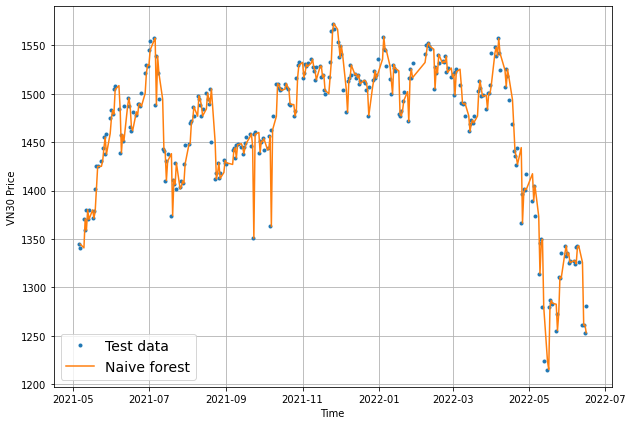

In [23]:
#Focus on test dataset
plt.figure(figsize=(10,7))
offset=200 #offset the values y 200 timesteps
plot_time_series(timesteps=X_test,values=y_test,start=offset,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format="-",start=offset,label="Naive forest")

Vì sử dụng giá trị timestep phía trước để dự đoán giá trị tiếp theo nên Naive Forecast có chút lagging so với test data

# **4.4 Đánh giá và so sánh**

Time series forecasting thường là dự đoán các số.

Nên để đánh giá thì ta so sánh sự khác giữa giá trị dự đoán (y_pred) với giá trị thực ( y_true).

Ta kỳ vọng sự khác nhau là thấp nhất. 

Ở đây ta sẽ sử dụng một số metrics để đánh giá

Sử dụng 

MAE

MAPE

In [24]:
import tensorflow as tf


In [25]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [26]:
def evaluate_preds(y_true, y_pred):
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  #Calculate various metrics
  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)

  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  from sklearn.metrics import r2_score
  r2score=r2_score(y_true, y_pred)

  return {"mae" : mae.numpy(), 
          "mape" : mape.numpy()
          }

In [27]:
naive_results=evaluate_preds(y_true=y_test[1:],y_pred=naive_forecast)
naive_results

{'mae': 13.249689, 'mape': 1.044281}

# 4.2 Model 2: Linear Regression ( Window=10, horizon=1)

In [28]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(feature_train, label_train)

LinearRegression()

In [29]:
# Make predictions using model_2 on the test dataset and view the results
model_2_preds = make_preds(model_2, feature_test)
len(model_2_preds), model_2_preds[:10]

(478, <tf.Tensor: shape=(10,), dtype=float64, numpy=
 array([815.4463483 , 802.98791784, 801.94874129, 797.48679146,
        800.23065189, 772.17145222, 725.50808462, 750.80292484,
        735.20943032, 746.93359693])>)

In [30]:
# Evaluate preds
model_2_results = evaluate_preds(y_true=tf.squeeze(label_test), # reduce to right shape
                                 y_pred=model_2_preds)
model_2_results

{'mae': 13.568897, 'mape': 1.0681437}

# 4.3 Model 3: RNN (LSTM)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from keras.layers import LSTM
from keras.layers import Dropout, SimpleRNN
from tensorflow.keras import layers
def design_model(features_train, learning_rate):
    #models layer-by-layer in a step-by-step
    model = Sequential(name="LSTM_model")
    model.add(InputLayer(input_shape=(WINDOW_SIZE,HORIZON)))

    model.add(LSTM(units = 128, activation="relu")) 
    model.add(Dense(32, activation="relu"))

    

    
    


    model.add(Dense(HORIZON))
    #initiate the optimizer
    opt = tf.keras.optimizers.Adam(learning_rate = learning_rate)

    model.compile(loss='mae', metrics=['mape'], optimizer=opt)
    return model

In [32]:
def fit_model(f_train,l_train,learning_rate,num_epochs):
  model=design_model(f_train,learning_rate)
  model.summary()

  stop=tf.keras.callbacks.EarlyStopping(  monitor="val_loss",  min_delta=0,
                                    patience=20,  verbose=1,    mode="min",
                                    baseline=None,  restore_best_weights=True)
  lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

  with tf.device('/device:GPU:0'):
    history=model.fit(f_train,l_train,epochs=num_epochs,batch_size=32,validation_split=0.2,verbose=1,callbacks=[stop], shuffle=True)
  return history

In [33]:
learning_rate= 0.01
num_epochs=200
model_3=fit_model(feature_train,label_train,learning_rate,num_epochs)

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 70,721
Trainable params: 70,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
48/48 [==============================] - 2s 18ms/step - loss: 85.5174 - mape: 12.6304 - val_loss: 16.9345 - val_mape: 2.1163
Epoch 2/200
48/48 [==============================] - 1s 12ms/step - loss: 22.5264 - mape: 3.2167 - val_loss: 16.4372 - val_mape: 2.0533
Epoch 3/200
48/48 [========================

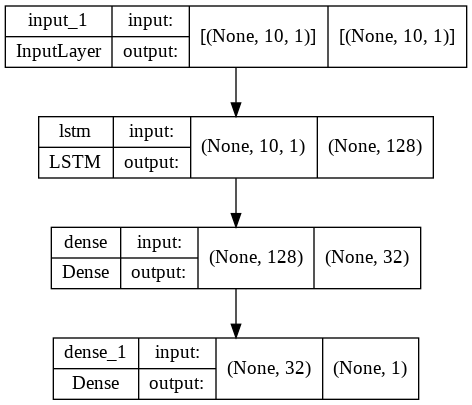

In [34]:
from keras.utils.vis_utils import plot_model
plot_model(model_3.model, show_shapes=True, show_layer_names=True)

In [35]:
# #để chọn learning rate
# lrs = 1e-3 * (10**(np.arange(50)/20))
# plt.semilogx(lrs, model_3.history['loss'])
# plt.xlabel("learning rate")
# plt.ylabel("loss")


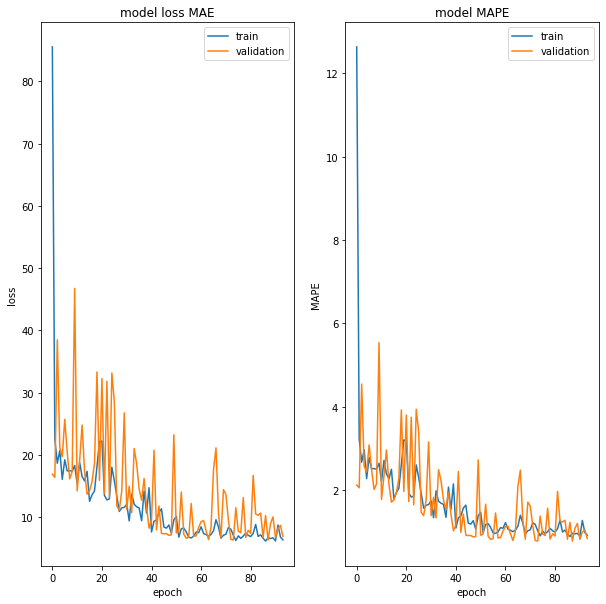

In [36]:
#early stopping epoch:168
#Plot loss (ME) and validation loss over epochs

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(model_3.history['loss'])
ax1.plot(model_3.history['val_loss'])
# ax1.plot([10,10],
#          plt.ylim(), label='EarlyStopping')
ax1.set_title('model loss MAE')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend(['train', 'validation'], loc='upper right')
#Plot MAPE and validation MAE over epochs
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(model_3.history['mape'])
ax2.plot(model_3.history['val_mape'])
# ax2.plot([10,10],
#          plt.ylim(), label='EarlyStopping')
ax2.set_title('model MAPE')
ax2.set_xlabel('epoch')
ax2.set_ylabel('MAPE')
ax2.legend(['train', 'validation'], loc='upper right')

In [37]:
# Make predictions with our LSTM model
model_3_preds = make_preds(model_3.model, feature_test)
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([814.2237 , 803.0569 , 805.4403 , 798.291  , 801.22186, 773.0561 ,
       731.9818 , 759.95917, 737.7345 , 747.93256], dtype=float32)>

In [38]:
# Evaluate model 4 preds
model_3_results = evaluate_preds(y_true=tf.squeeze(label_test),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 13.17522, 'mape': 1.0370784}

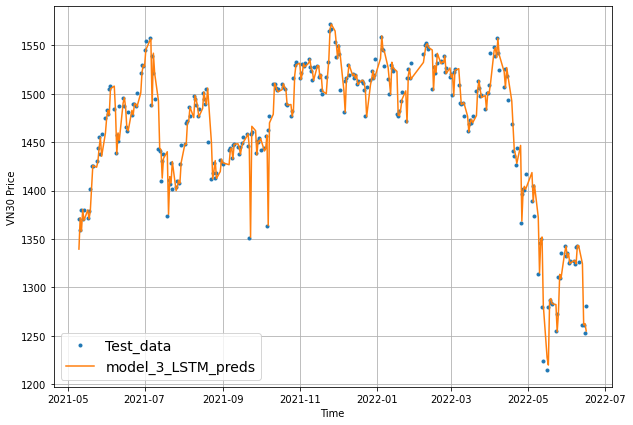

In [39]:
offset =200
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(feature_test):], values=label_test, start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(feature_test):], values=model_3_preds, start=offset, format="-", label="model_3_LSTM_preds")

# **4.4 Đánh giá và so sánh các model**

In [40]:
# Compare different model results 
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_2_LR":model_2_results,
                              "model_3_LSTM": model_3_results}).T
model_results

,mae,mape
naive_model,13.249689,1.044281
model_2_LR,13.568897,1.068144
model_3_LSTM,13.175220,1.037078


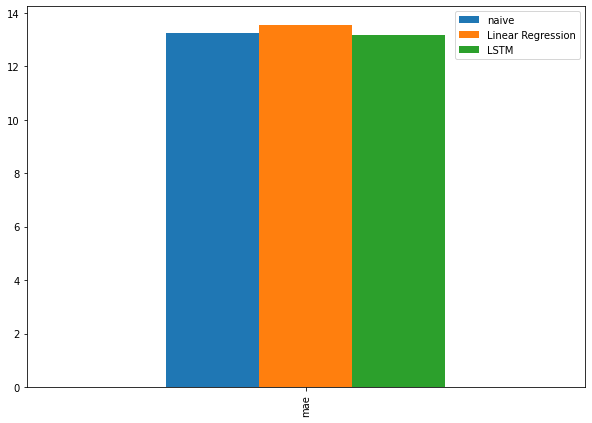

In [41]:
pd.DataFrame({"naive": naive_results["mae"], 
              "Linear Regression": model_2_results["mae"],
              "LSTM": model_3_results["mae"],
              }, index=["mae"]).plot(figsize=(10, 7), kind="bar")

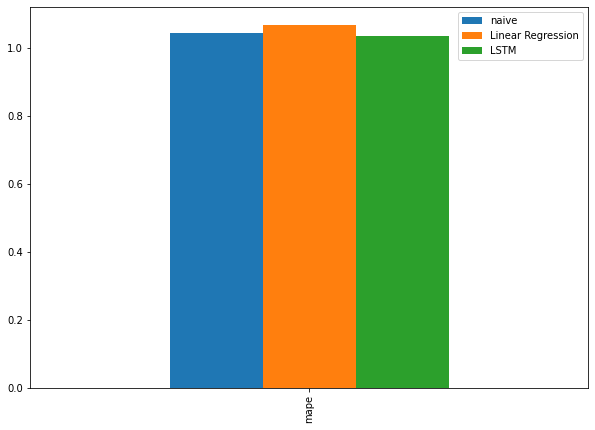

In [42]:
pd.DataFrame({"naive": naive_results["mape"], 
              "Linear Regression": model_2_results["mape"],
              "LSTM": model_3_results["mape"],
              }, index=["mape"]).plot(figsize=(10, 7), kind="bar")

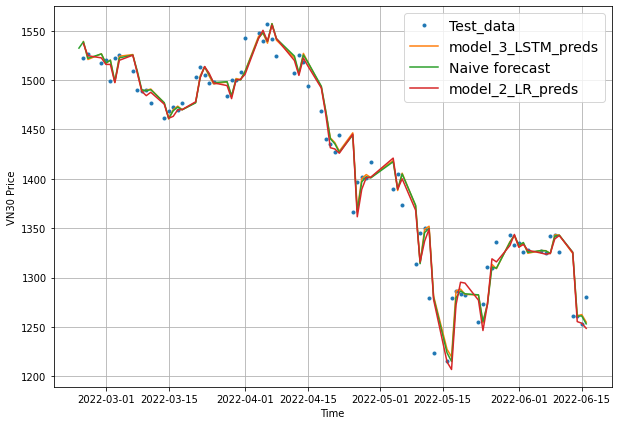

In [43]:
offset =400
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(feature_test):], values=label_test, start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(feature_test):], values=model_3_preds, start=offset, format="-", label="model_3_LSTM_preds")

plot_time_series(timesteps=X_test[1:], values=naive_forecast,start=offset, format="-", label="Naive forecast")
plot_time_series(timesteps=X_test[-len(feature_test):], values=model_2_preds, start=offset, format="-", label="model_2_LR_preds")

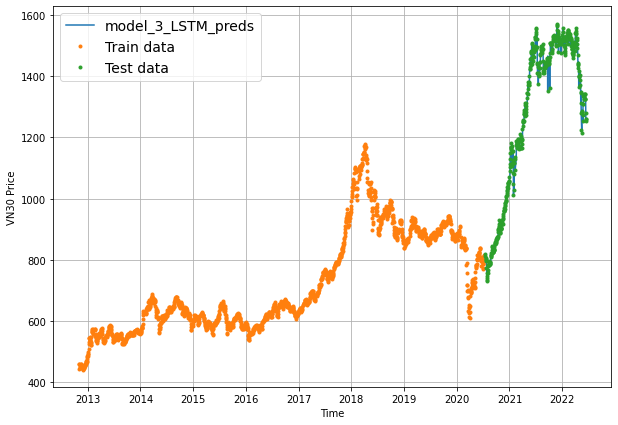

In [44]:
plt.figure(figsize=(10, 7))
offset =0
plot_time_series(timesteps=X_test[-len(feature_test):], values=model_3_preds, start=offset, format="-", label="model_3_LSTM_preds")
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [45]:
#save LSTM model
model_3.model.save("VN30Forecasting_Model.h5")